## Comparing the two measurement stations at the Bismarckplatz and the one close to the Neckar

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load the data into a GeoPandas DataFrame
gdf = gpd.read_file('C:/Users/user/OneDrive/Documents/Uni/Master Heidelberg/Masterarbeit/data/sensor_data_202407081200_7days.gpkg')

# Preview the data
gdf

,entity_id,dateobserved,dateobserved-hourly,description,location,temperature,relativehumidity,dewpoint,atmosphericpressure,solarradiation,precipitation,windspeed,winddirection,geometry
0,hd:DE_Heidelberg_69118_8:WeatherObserved,2023-07-08T12:03:18.358000+00:00,2023-07-08T12:00:00+00:00,Lufft Wetterstation WS601 Köpfel,"{""coordinates"": [8.749880791, 49.420654184], ""...",29.2,39.9,14.2,992.40,NaN,0.0,2.20,291.2,POINT (8.74988 49.42065)
1,hd:DE_Heidelberg_69115_28:WeatherObserved,2023-07-08T12:02:00.292000+00:00,2023-07-08T12:00:00+00:00,MeteoHelix_03_Altstadt_Bismarckplatz,"{""coordinates"": [8.692997438, 49.409958497], ""...",30.3,40.0,NaN,1004.95,630.0,NaN,NaN,NaN,POINT (8.69300 49.40996)
2,hd:DE_Heidelberg_46:WeatherObserved,2023-07-08T12:02:55.192001+00:00,2023-07-08T12:00:00+00:00,MeteoHelixR_21_Boxberg_DAH,"{""coordinates"": [8.703570385, 49.374008928], ""...",28.6,39.4,NaN,990.40,78.0,NaN,NaN,NaN,POINT (8.70357 49.37401)
3,hd:DE_Heidelberg_69117_36:WeatherObserved,2023-07-08T12:05:05.995000+00:00,2023-07-08T12:00:00+00:00,MeteoHelix_11_Weststadt_Christuskirche,"{""coordinates"": [8.685379562, 49.402040105], ""...",31.4,37.2,NaN,1004.70,782.0,NaN,NaN,NaN,POINT (8.68538 49.40204)
4,hd:DE_Heidelberg_69123_3:WeatherObserved,2023-07-08T12:10:00+00:00,2023-07-08T12:00:00+00:00,Wasserwerk Rauschen,"{""coordinates"": [8.623167, 49.42132], ""type"": ...",32.1,34.2,NaN,NaN,NaN,1.5,1.96,324.0,POINT (8.62317 49.42132)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18494,hd:DE_Heidelberg_69115_4:WeatherObserved,2023-07-10T07:40:00+00:00,2023-07-10T08:00:00+00:00,Institutsdach Czernyring,"{""coordinates"": [8.6761, 49.400672], ""type"": ""...",24.7,67.4,NaN,1004.10,NaN,0.1,2.60,342.0,POINT (8.67610 49.40067)
18495,hd:DE_Heidelberg_69115_4:WeatherObserved,2023-07-10T10:00:00+00:00,2023-07-10T10:00:00+00:00,Institutsdach Czernyring,"{""coordinates"": [8.6761, 49.400672], ""type"": ""...",28.6,53.4,NaN,1004.10,NaN,0.1,3.80,306.0,POINT (8.67610 49.40067)
18496,hd:DE_Heidelberg_69115_4:WeatherObserved,2023-07-10T11:10:00+00:00,2023-07-10T11:00:00+00:00,Institutsdach Czernyring,"{""coordinates"": [8.6761, 49.400672], ""type"": ""...",30.1,47.9,NaN,1003.40,NaN,0.1,3.00,269.0,POINT (8.67610 49.40067)
18497,hd:DE_Heidelberg_69115_4:WeatherObserved,2023-07-10T10:50:00+00:00,2023-07-10T11:00:00+00:00,Institutsdach Czernyring,"{""coordinates"": [8.6761, 49.400672], ""type"": ""...",29.4,50.1,NaN,1003.60,NaN,0.1,3.00,280.0,POINT (8.67610 49.40067)


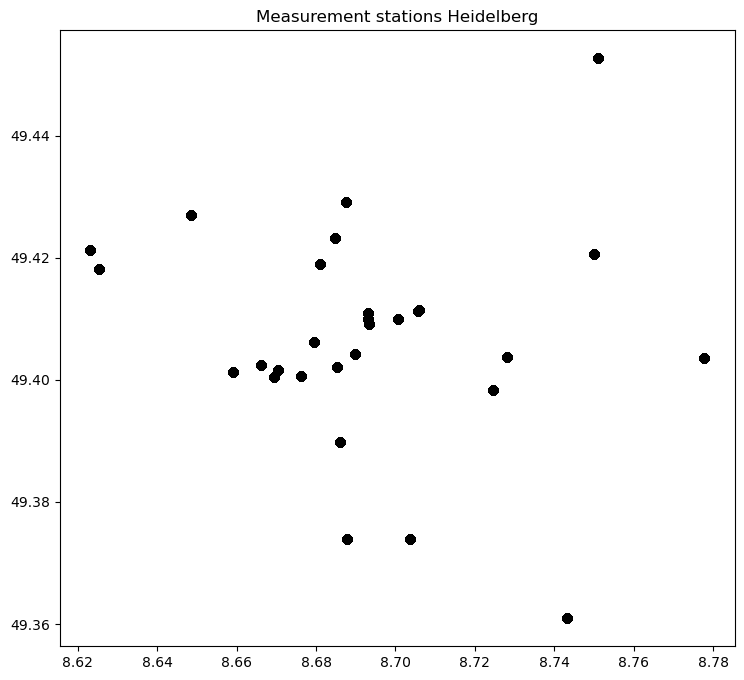

In [32]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrame
gdf.plot(ax=ax, color='black')

# Add title and show the plot
plt.title("Measurement stations Heidelberg")
plt.show()

In [47]:
# Convert 'dateobserved' to datetime if it's not already
gdf['dateobserved-hourly'] = pd.to_datetime(gdf['dateobserved-hourly'])

# Specify the target timestamp (replace 'YYYY-MM-DD HH:MM:SS' with the actual timestamp)
target_timestamp = '2023-07-09T00:00:00+00:00'

# Filter the rows for the specific timestamp
subset_timestamp = gdf[gdf['dateobserved-hourly'] == target_timestamp]

# Now group by the station identifier (e.g., 'description' or 'entity_id') and pick the first measurement
subset_grouped = subset_timestamp.groupby('description').first().reset_index()

# Show the subset
subset_grouped


,description,entity_id,dateobserved,dateobserved-hourly,location,temperature,relativehumidity,dewpoint,atmosphericpressure,solarradiation,precipitation,windspeed,winddirection,geometry
0,Gaiberg-Berghof,hd:DE_Gaiberg_69251_21:WeatherObserved,2023-07-08 23:50:00+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.74322, 49.36094], ""type"": ""...",21.50,55.6,NaN,980.00,NaN,0.1,1.030000,327.0,POINT (8.74322 49.36094)
1,Grenzhöfer Weg Winterdienst,hd:DE_Heidelberg_69123_24:WeatherObserved,2023-07-08 23:36:00+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.6253, 49.4182442], ""type"": ...",22.91,NaN,15.69,NaN,NaN,0.1,0.780556,146.3,POINT (8.62530 49.41824)
2,Institutsdach Czernyring,hd:DE_Heidelberg_69115_4:WeatherObserved,2023-07-09 00:10:00+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.6761, 49.400672], ""type"": ""...",23.30,53.1,NaN,1002.20,NaN,0.1,0.800000,50.0,POINT (8.67610 49.40067)
3,Königstuhl Winterdienst,hd:DE_Heidelberg_69117_5:WeatherObserved,2023-07-08 23:38:00+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.728104, 49.403737], ""type"":...",24.59,NaN,12.78,NaN,NaN,0.7,0.463889,199.2,POINT (8.72810 49.40374)
4,Landessternwarte - Königstuhl,hd:DE_Heidelberg_69117_1:WeatherObserved,2023-07-08 23:40:00+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.724495, 49.398345], ""type"":...",24.70,43.4,NaN,NaN,NaN,0.1,0.656000,157.0,POINT (8.72449 49.39834)
5,Lufft Wetterstation WS601 Karlsruher Str.,hd:DE_Heidelberg_69126_11:WeatherObserved,2023-07-08 23:39:04.031000+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.687835932, 49.373941705], ""...",22.70,57.8,13.90,1005.90,NaN,0.2,0.300000,15.1,POINT (8.68784 49.37394)
6,Lufft Wetterstation WS601 Köpfel,hd:DE_Heidelberg_69118_8:WeatherObserved,2023-07-09 00:23:13.736000+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.749880791, 49.420654184], ""...",21.00,61.3,13.30,993.70,NaN,0.0,1.000000,79.8,POINT (8.74988 49.42065)
7,MeteoHelixR_02_Handschuhsheim_Mühltalstr.,hd:DE_Heidelberg_69121_27:WeatherObserved,2023-07-09 00:11:53.290001+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.687459774, 49.429073406], ""...",22.50,55.8,NaN,1005.70,4.0,1.8,NaN,NaN,POINT (8.68746 49.42907)
8,MeteoHelixR_04_Bahnstadt_Zollhofgarten,hd:DE_Heidelberg_69115_29:WeatherObserved,2023-07-09 00:07:39.862999+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.670522049, 49.401696698], ""...",23.30,54.2,NaN,1005.80,2.0,NaN,NaN,NaN,POINT (8.67052 49.40170)
9,MeteoHelixR_05_Südstadt_Römerstr.,hd:DE_Heidelberg_69126_30:WeatherObserved,2023-07-09 00:17:27.145000+00:00,2023-07-09 00:00:00+00:00,"{""coordinates"": [8.686060927, 49.389741433], ""...",22.70,57.4,NaN,1006.55,2.0,6.0,NaN,NaN,POINT (8.68606 49.38974)


In [48]:
# Specify the path where you want to save the GeoPackage
output_gpkg = "C:/Users/user/OneDrive/Documents/Uni/Master Heidelberg/Masterarbeit/data/temp/subset_temp_data.gpkg"

# Save the subset as a GeoPackage
subset_grouped.to_file(output_gpkg, driver="GPKG")

In [33]:
# Define the values to filter
filter_values = [
    'hd:DE_Heidelberg_69115_38:WeatherObserved',
    'hd:DE_Heidelberg_69117_1:WeatherObserved'
]

# Filter the DataFrame
station_df = gdf[gdf.isin(filter_values).any(axis=1)]

# Preview the filtered data
station_df

,entity_id,dateobserved,dateobserved-hourly,description,location,temperature,relativehumidity,dewpoint,atmosphericpressure,solarradiation,precipitation,windspeed,winddirection,geometry
20,hd:DE_Heidelberg_69117_1:WeatherObserved,2023-07-08T12:20:00+00:00,2023-07-08T12:00:00+00:00,Landessternwarte - Königstuhl,"{""coordinates"": [8.724495, 49.398345], ""type"":...",28.4,40.0,NaN,NaN,NaN,0.1,1.57,192.0,POINT (8.72449 49.39834)
50,hd:DE_Heidelberg_69117_1:WeatherObserved,2023-07-08T12:40:00+00:00,2023-07-08T13:00:00+00:00,Landessternwarte - Königstuhl,"{""coordinates"": [8.724495, 49.398345], ""type"":...",27.8,41.1,NaN,NaN,NaN,0.1,2.26,174.0,POINT (8.72449 49.39834)
70,hd:DE_Heidelberg_69115_38:WeatherObserved,2023-07-08T12:56:38.424999+00:00,2023-07-08T13:00:00+00:00,MeteoHelix_13_Altstadt_Bismarckplatz_Süd,"{""coordinates"": [8.69331783, 49.409106941], ""t...",31.1,37.8,NaN,1004.80,60.0,NaN,NaN,NaN,POINT (8.69332 49.40911)
97,hd:DE_Heidelberg_69117_1:WeatherObserved,2023-07-08T13:00:00+00:00,2023-07-08T13:00:00+00:00,Landessternwarte - Königstuhl,"{""coordinates"": [8.724495, 49.398345], ""type"":...",28.0,41.7,NaN,NaN,NaN,0.1,2.04,178.0,POINT (8.72449 49.39834)
104,hd:DE_Heidelberg_69115_38:WeatherObserved,2023-07-08T13:16:38.611000+00:00,2023-07-08T13:00:00+00:00,MeteoHelix_13_Altstadt_Bismarckplatz_Süd,"{""coordinates"": [8.69331783, 49.409106941], ""t...",31.0,37.2,NaN,1004.75,298.0,NaN,NaN,NaN,POINT (8.69332 49.40911)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,hd:DE_Heidelberg_69117_1:WeatherObserved,2023-07-10T10:10:00+00:00,2023-07-10T10:00:00+00:00,Landessternwarte - Königstuhl,"{""coordinates"": [8.724495, 49.398345], ""type"":...",23.9,68.3,NaN,NaN,NaN,0.1,2.50,312.0,POINT (8.72449 49.39834)
18346,hd:DE_Heidelberg_69117_1:WeatherObserved,2023-07-10T10:30:00+00:00,2023-07-10T10:00:00+00:00,Landessternwarte - Königstuhl,"{""coordinates"": [8.724495, 49.398345], ""type"":...",24.3,66.6,NaN,NaN,NaN,0.1,2.02,320.0,POINT (8.72449 49.39834)
18363,hd:DE_Heidelberg_69115_38:WeatherObserved,2023-07-10T11:06:29.007000+00:00,2023-07-10T11:00:00+00:00,MeteoHelix_13_Altstadt_Bismarckplatz_Süd,"{""coordinates"": [8.69331783, 49.409106941], ""t...",28.3,53.0,NaN,1007.65,164.0,NaN,NaN,NaN,POINT (8.69332 49.40911)
18433,hd:DE_Heidelberg_69117_1:WeatherObserved,2023-07-10T11:30:00+00:00,2023-07-10T12:00:00+00:00,Landessternwarte - Königstuhl,"{""coordinates"": [8.724495, 49.398345], ""type"":...",25.6,59.8,NaN,NaN,NaN,0.1,1.56,297.0,POINT (8.72449 49.39834)


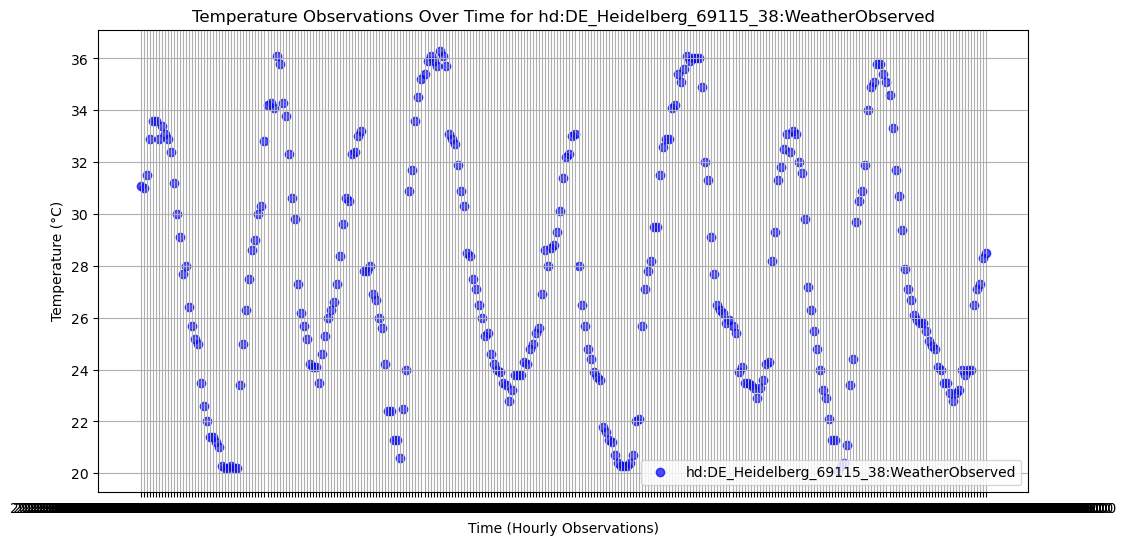

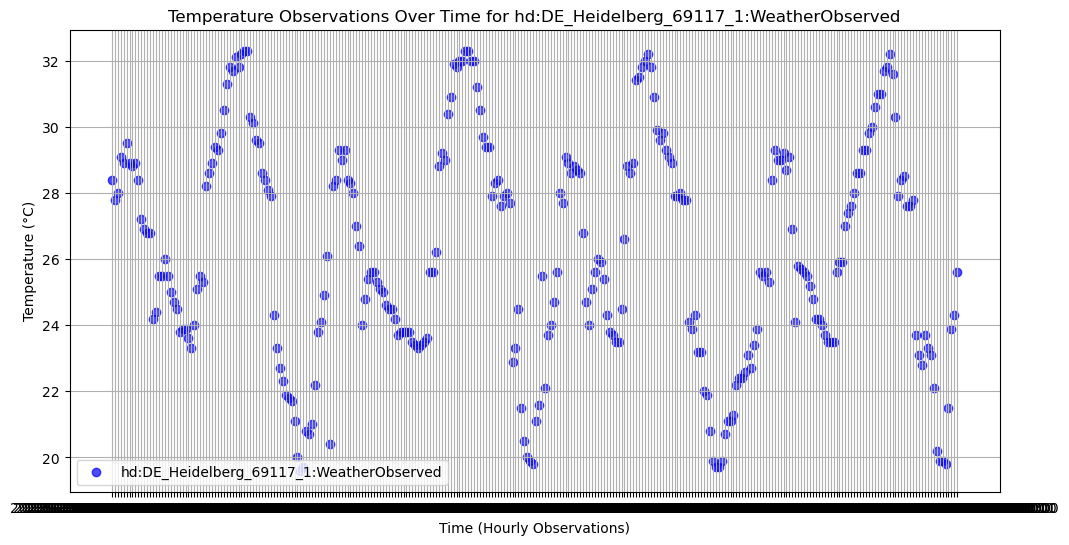

In [34]:
# Loop through each value to create individual scatter plots
for station_name in filter_values:
    # Subset the GeoDataFrame for the current station
    subset_df = station_df[station_df.isin([station_name]).any(axis=1)]
    
    # Create the scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(
        subset_df['dateobserved'], 
        subset_df['temperature'], 
        label=station_name, 
        color='blue', 
        alpha=0.7  # Adjust transparency
    )
    
    # Customize the plot
    plt.xlabel('Time (Hourly Observations)')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperature Observations Over Time for {station_name}')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

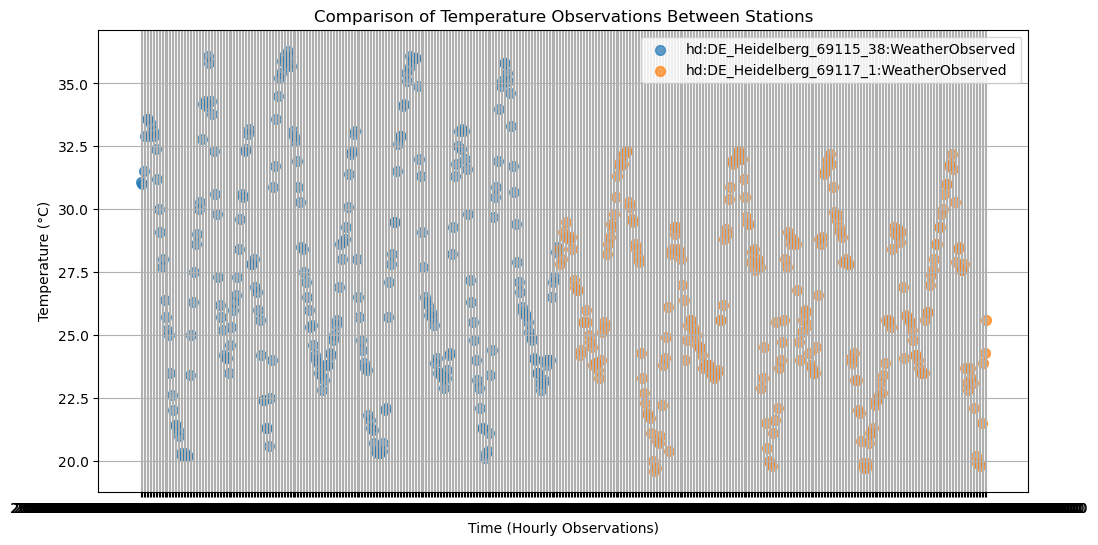

In [35]:
# Create the figure
plt.figure(figsize=(12, 6))

# Plot both datasets on the same plot as scatter plots
for station_name in filter_values:
    subset_df = station_df[station_df.isin([station_name]).any(axis=1)]
    plt.scatter(
        subset_df['dateobserved'], 
        subset_df['temperature'], 
        label=station_name, 
        alpha=0.7,  # Transparency for clarity
        s=50        # Marker size
    )

# Customize the plot
plt.xlabel('Time (Hourly Observations)')
plt.ylabel('Temperature (°C)')
plt.title('Comparison of Temperature Observations Between Stations')
plt.legend()
plt.grid(True)
plt.show()

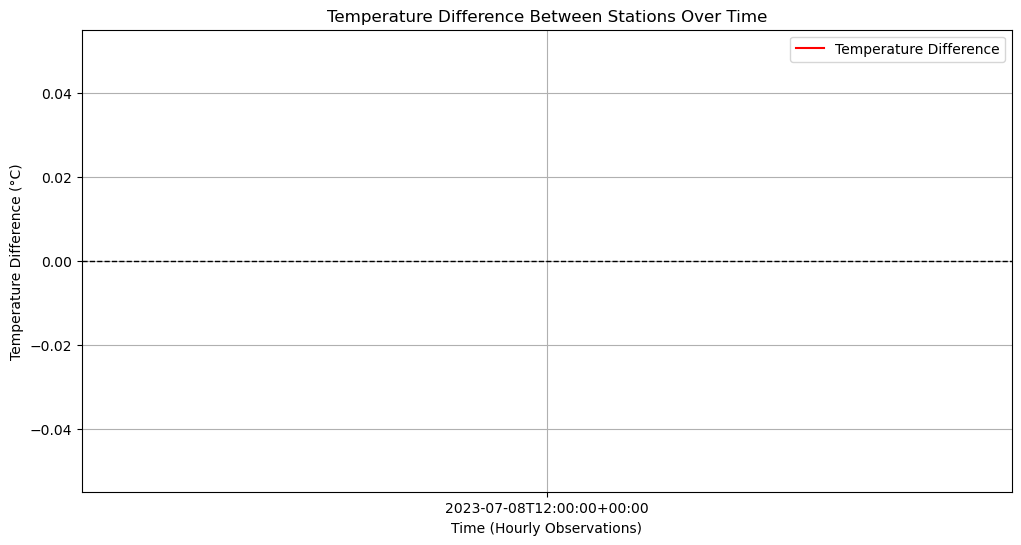

In [36]:
# Merge the two subsets on the timestamp (dateobserved)
merged_df = station_df[station_df['entity_id'].isin(filter_values)]
pivoted_df = merged_df.pivot(index='dateobserved', columns='entity_id', values='temperature')

# Calculate the difference
pivoted_df['temperature_diff'] = pivoted_df[filter_values[0]] - pivoted_df[filter_values[1]]

# Plot the temperature difference
plt.figure(figsize=(12, 6))
plt.plot(
    pivoted_df.index, 
    pivoted_df['temperature_diff'], 
    label='Temperature Difference', 
    color='red'
)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line
plt.xlabel('Time (Hourly Observations)')
plt.ylabel('Temperature Difference (°C)')
plt.title('Temperature Difference Between Stations Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
for station_name in filter_values:
    subset_df = station_df[station_df.isin([station_name]).any(axis=1)]
    print(f"Statistics for {station_name}:")
    print(subset_df['temperature'].describe())
    print("\n")


Statistics for hd:DE_Heidelberg_69115_38:WeatherObserved:
count    281.000000
mean      27.686477
std        4.649911
min       20.100000
25%       24.000000
50%       26.900000
75%       31.900000
max       36.300000
Name: temperature, dtype: float64


Statistics for hd:DE_Heidelberg_69117_1:WeatherObserved:
count    288.000000
mean      26.216667
std        3.385242
min       19.600000
25%       23.700000
50%       25.650000
75%       28.900000
max       32.300000
Name: temperature, dtype: float64




In [39]:
# Correlation between the two stations
correlation = pivoted_df[filter_values[0]].corr(pivoted_df[filter_values[1]])
print(f"Correlation between the two stations: {correlation}")

Correlation between the two stations: nan
